<a href="https://colab.research.google.com/github/PedroDS4/Equacoes-Diferenciais-Aplicadas/blob/main/Projeto_2_CN_EDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Projeto 2 CN: Equações Diferenciais**

##**Questao 1: Sistema Massa-Mola-Amortecedor**
Um sistema massa-mola-amortecedor em cascata é dado pela figura abaixo
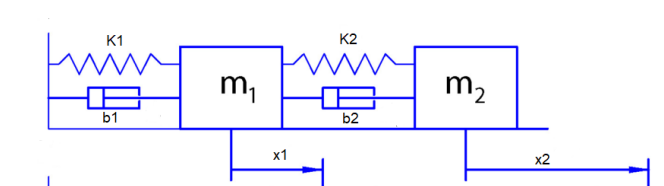


Aplicando a segunda lei de newton para cada bloco, podemos determinar o modelo de estados que descrever as variáveis de posiçaõ dos dois blocos

**Bloco 2**
Aplicando a segunda lei de newton no bloco 2
$$
\vec{F}_{res} = m_2 \vec{a_2} =  \vec{F} + \vec{F}_{elástica} + \vec{F}_{amortecimento}
$$

e temos que

$$
\vec{F}_{elástica} = k ( x_1(t) - x_2(t) )
$$

e para o amortecimento

$$
\vec{F}_{amortecimento} = b \cdot (v_1(t) - v_2(t)) = b \cdot \frac{d}{dt}(x_1(t) - x_2(t) )
$$

assim a expressão fica

$$
m_2 a_2 = m_2 \frac{d}{dt}v_2(t) = F(t) - kx_2(t) - bv_2(t)
$$

simplificando

$$
\frac{d}{dt}v_2(t) = \frac{1}{m_2}[ F(t) - kx_2(t) - bv_2(t) ]
$$


**Bloco 1**
Aplicando a segunda lei de newton no bloco 1

$$
\vec{F}_{res1} = m_1 \vec{a_1} = \vec{F}_{elástica1} + \vec{F}_{amortecimento1} + \vec{F}_{elástica2} + \vec{F}_{amortecimento2}
$$


e temos que

$$
\vec{F}_{elástica_+} = k_2 ( x_2(t) - x_1(t) )
$$

e

$$
\vec{F}_{elástica_-} = -k_1 x_1(t)
$$


e para o amortecimento

$$
\vec{F}_{amortecimento_+} = b_2 \cdot (v_2(t) - v_1(t))
$$

e

$$
\vec{F}_{amortecimento_-} = - b_1 \cdot v_1
$$

então temos

$$
m_1 \frac{d}{dt} v_1(t) =  b_2 v_2(t) + k_2 x_2(t) - (b_1 + b_2)v_1(t) - (k_1+k_2)x_1(t)
$$



a equação diferencial final fica então

$$
\frac{d}{dt} v_1(t) = \frac{1}{m_1}  [ b_2 v_2(t) + k_2 x_2(t) - (b_1 + b_2)v_1(t) - (k_1+k_2)x_1(t)]
$$


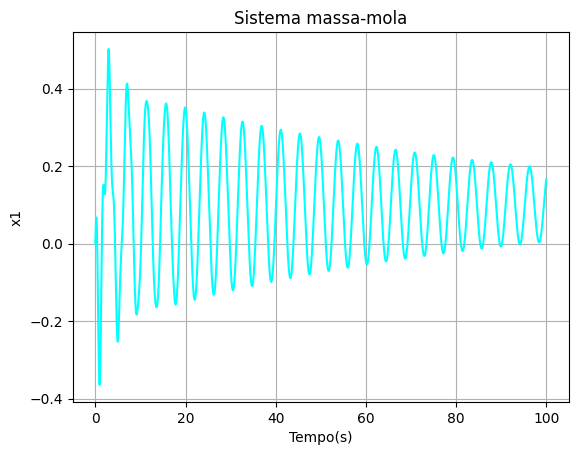

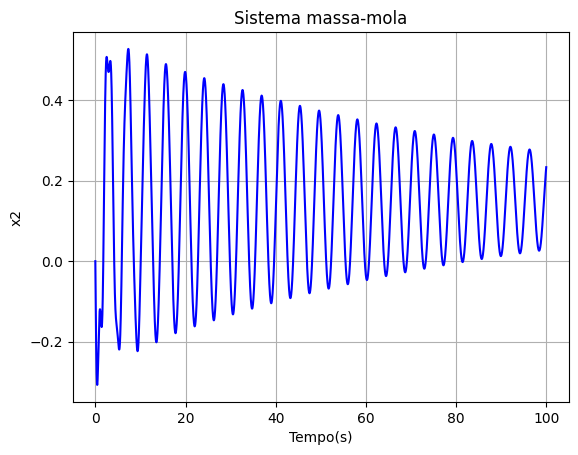

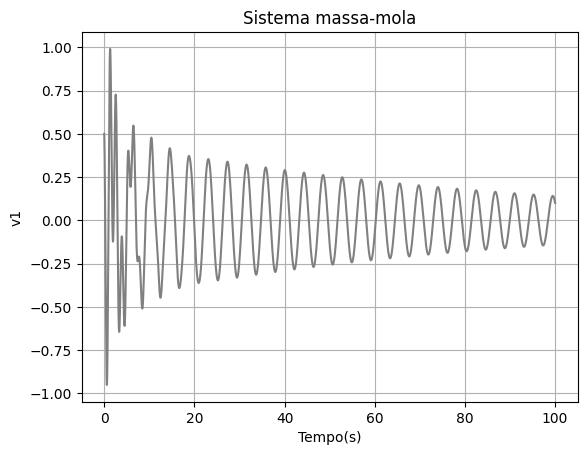

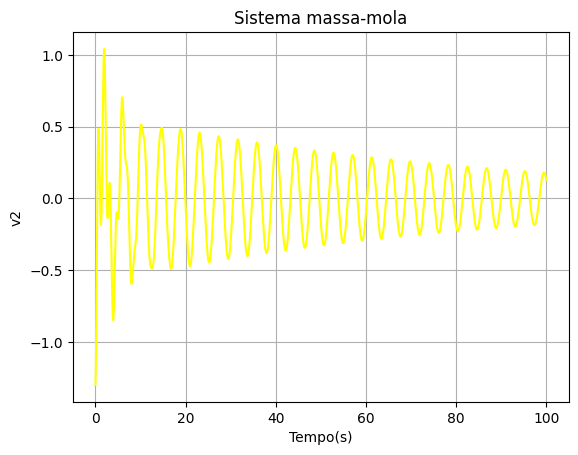

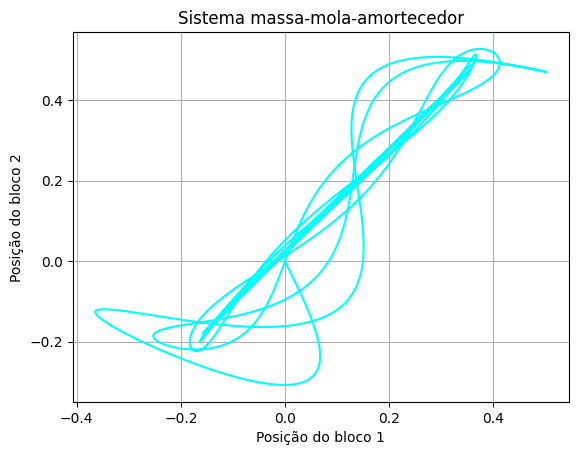

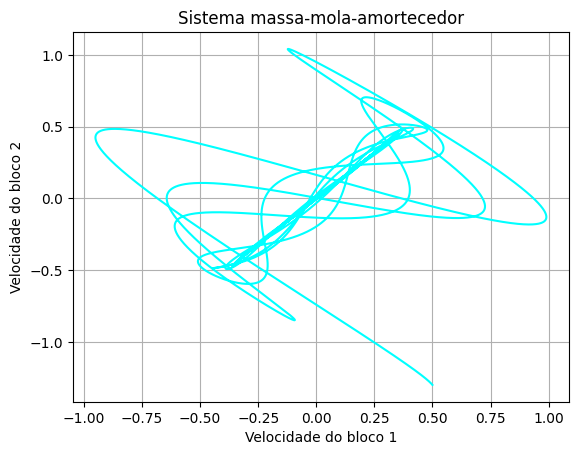

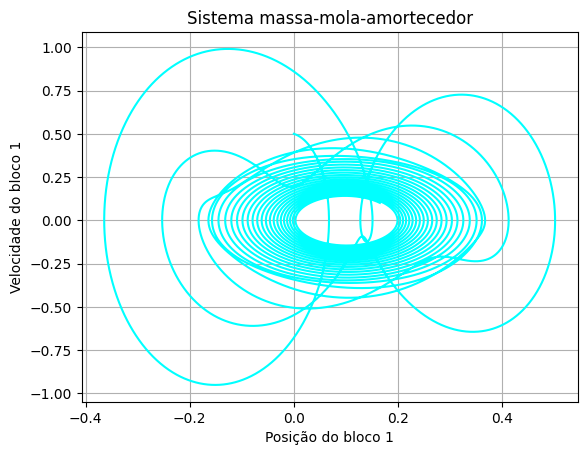

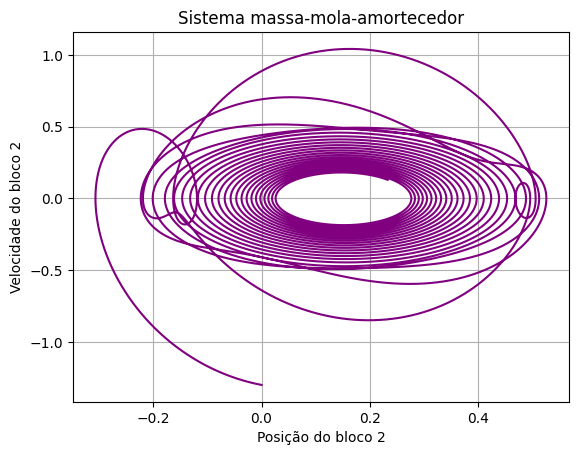

In [ ]:
#Questão 1

import numpy as np
import matplotlib.pyplot as plt

m1 = m2 = 20
k1 = 100
k2 = 200
b1 = 1
b2 = 5
dt = 0.001

t = np.arange(0,100,dt)
n = int((t[-1]-t[0])/dt)

x1 = np.empty(n+1)
x2 = np.empty(n+1)
v1 = np.empty(n+1)
v2 = np.empty(n+1)

x1[0],x2[0],v1[0],v2[0],F = 0,0,0.5,-1.3,10

def euler(x1,x2,x3,x4):
  for i in range(n):
    x1[i+1] = x1[i] + dt*v1[i]
    x2[i+1] = x2[i] + dt*v2[i]

    v1[i+1] = v1[i] + (dt/m1)*(-(k1+k2)*x1[i]-(b1+b2)*v1[i]+k2*(x2[i])+b2*(v2[i]))
    v2[i+1] = v2[i] + (dt/m2)*(F + k2*(x1[i] - x2[i]) + b2*( v1[i] - v2[i] ))


euler(x1,x2,v1,v2)


fig, ax = plt.subplots()
fig, bx = plt.subplots()
fig, cx = plt.subplots()
fig, dx = plt.subplots()

ax.set(xlabel = 'Tempo(s)',ylabel = 'x1',title = 'Sistema massa-mola')
ax.plot(t,x1,'cyan')
ax.grid()
bx.set(xlabel = 'Tempo(s)',ylabel = 'x2',title = 'Sistema massa-mola')
bx.plot(t,x2,'blue')
bx.grid()
cx.set(xlabel = 'Tempo(s)',ylabel = 'v1',title = 'Sistema massa-mola')
cx.plot(t,v1,'gray')
cx.grid()
dx.set(xlabel = 'Tempo(s)',ylabel = 'v2',title = 'Sistema massa-mola')
dx.plot(t,v2,'yellow')
dx.grid()



#Diagramas de fase 2D
fig1 = plt.figure()
a1x = plt.axes()
a1x.plot(x1,x2,'cyan')
a1x.set(xlabel = 'Posição do bloco 1',ylabel = 'Posição do bloco 2', title = 'Sistema massa-mola-amortecedor')
plt.grid()

fig2 = plt.figure()
a2x = plt.axes()
a2x.plot(v1,v2,'cyan')
a2x.set(xlabel = 'Velocidade do bloco 1',ylabel = 'Velocidade do bloco 2', title = 'Sistema massa-mola-amortecedor')
plt.grid()

# Diagrama de fases 3D
fig3 = plt.figure()
a3x = plt.axes()
a3x.plot(x1,v1,'cyan')
a3x.set(xlabel = 'Posição do bloco 1',ylabel = 'Velocidade do bloco 1', title = 'Sistema massa-mola-amortecedor')
plt.grid()

fig4 = plt.figure()
a4x = plt.axes()
a4x.plot(x2,v2,'purple')
a4x.set(xlabel = 'Posição do bloco 2',ylabel = 'Velocidade do bloco 2', title = 'Sistema massa-mola-amortecedor')
plt.grid()

##**Questão 2: Sistema Predador-Presa**
As equações tradicionais de Lotka-Voterra modelam as interações num ecosistema com- 2.
posto por predadores e presas. No entanto, tais equações são irrealistas levando-se em
conta que não incluem o efeito dos recursos no ambiente, bem como a oferta de alimentos para a presa. Além disso, no ambiente moderno, as presas são frequentemente
abatidas ou colhidas. Um sistema mais realista pode ser observado por meio das seguintes equações:

$$
\begin{align*}
x' &= x(a-cx-dy) \\
y' &= -y(b-ex)-h
\end{align*}
$$

onde os termos $x, y, a, b, c, d, e, h$ são positivos, e $$a/c > b/e$$

Neste modelo temos que,
* x representa a quantidade de presas
* y representa o número de predadores
* a é a taxa de crescimento das presas
* b a taxa de mortandade dos predadores idependente das presas
* c é a taxa de consumo das presas pelos predadores
* a/c é a capacidade de regeneração das presas idependente dos predadores
* e representa a taxa de crescimento dos predadores por presa consumida e,
* h representa a captura de presas.

[Text(0.5, 0, 'Predadores'),
 Text(0.5, 0.5, 'Presas'),
 Text(0.5, 0, 'Tempo'),
 Text(0.5, 0.92, 'Gráfico 3d Ecosistema')]

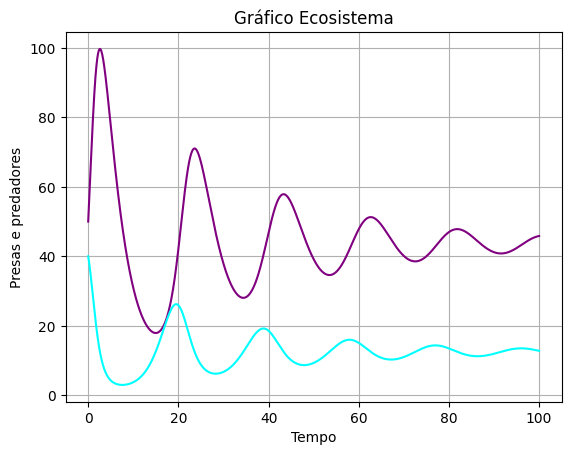

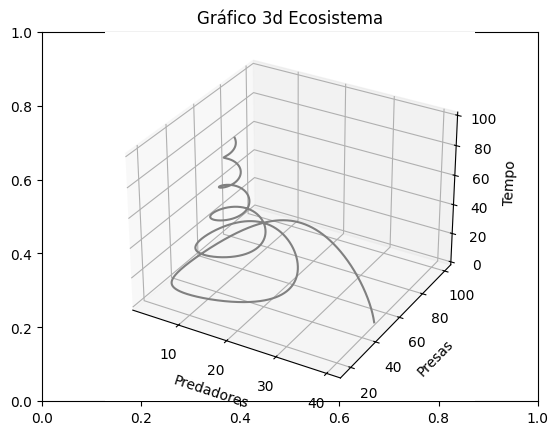

In [ ]:
#Questão 2
import numpy as np
import matplotlib.pyplot as plt




a,b,c,d,e,h = (1,0.25,0.01,0.02,0.02,0.02)
dt = 0.001
t = np.arange(0,100,dt)
n = int((t[-1])/dt)


x = np.empty(n+1)
y = np.empty(n+1)
x[0],y[0] = (40,50)

def fx(t,x,y):
  f =  (x*(a-c*x-d*y))/2
  return f

def fy(t,x,y):
  f = (-y*(b-e*x)-h)
  return f

def euler(x,y):
  for i in range(n):
    x[i+1] = x[i] + dt*fx(t,x[i],y[i])
    y[i+1] = y[i] + dt*fy(t,x[i],y[i])

def RK2(x1,x2):
  for i in range(n):
    k1 = fx(t,x1[i],x2[i])
    k2 = fx(t+dt/2,x1[i]+k1*dt/2,x2[i]+k1*dt/2)
    x1[i+1]=x1[i]+dt*((k1+k2)/2)
    k1 = fy(t,x1[i],x2[i])
    k2 = fy(t+dt/2,x1[i]+k1*dt/2,x2[i]+k1*dt/2)
    x2[i+1]=x2[i]+dt*((k1+k2)/2)

#euler(x,y)
RK2(x,y)

fig1, ax = plt.subplots()
ax.plot(t,y,'purple')
ax.plot(t,x,'cyan')
ax.grid()
ax.set(xlabel = 'Tempo',ylabel = 'Presas e predadores', title = 'Gráfico Ecosistema')

fig2, bx = plt.subplots()
bx = plt.axes(projection = "3d")
bx.plot(x,y,t,'gray')
bx.grid()
bx.set(xlabel = 'Predadores',ylabel = 'Presas', zlabel = 'Tempo', title = 'Gráfico 3d Ecosistema')

##**Questão 3: Sistema com pêndulo duplo**
O pêndulo amortecido pode ser modelado pelas equações diferenciais abaixo


$$
\begin{align*}
\frac{d}{dt}x_1(t) &= -\frac{1}{L}(gsen\theta+ 2x_1 x_2) \\
\frac{d}{dt}x_2(t) &= \frac{1}{m}[ mL{x_1}^2- k(L-L_0) + mgcos\theta ]
\end{align*}
$$



[Text(0.5, 0, 'Posição do primeiro pêndulo'),
 Text(0, 0.5, 'posição do segundo pêndulo'),
 Text(0.5, 1.0, 'Pêndulo')]

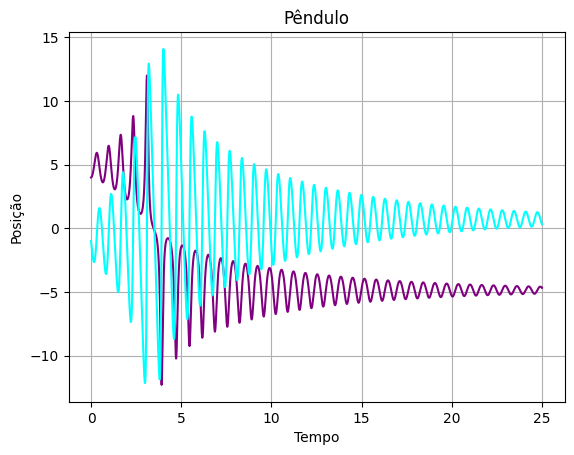

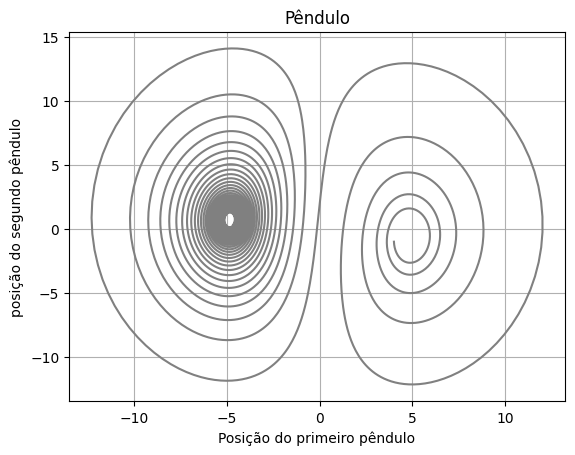

In [ ]:
#Questão 3
import numpy as np
import matplotlib.pyplot as plt


l=2
l0=1
k=40
m=1
g=9.81
theta=3*np.pi/4
dt=0.005
t=np.arange(0,25,dt)
n=int((t[-1]-t[0])/dt)
x1=np.empty(n+1)
x2=np.empty(n+1)
x1[0],x2[0]=4,-1
def fx1(t,x1,x2):
  f =  (-1/l)*(g*np.sin(theta)+2*x1*x2)
  return f

def fx2(t,x1,x2):
  f = (1/m)*(m*l*(x1**2)-k*(l-l0)+m*g*np.cos(theta))
  return f

def RK2(x1,x2):
  for i in range(n):
    k1 = fx1(t,x1[i],x2[i])
    k2 = fx1(t+dt/2,x1[i]+k1*dt/2,x2[i]+k1*dt/2)
    x1[i+1]=x1[i]+dt*((k1+k2)/2)
    k1 = fx2(t,x1[i],x2[i])
    k2 = fx2(t+dt/2,x1[i]+k1*dt/2,x2[i]+k1*dt/2)
    x2[i+1]=x2[i]+dt*((k1+k2)/2)

def euler(x1,x2):
  for i in range(n):
    x1[i+1]=x1[i]+dt*(fx1(t,x1[i],x2[i]))
    x2[i+1]=x2[i]+dt*(fx2(t,x1[i],x2[i]))

euler(x1,x2)


# RK2(x1,x2)

fig1 ,ax = plt.subplots()
ax.plot(t,x1,"purple",label = 'Posiçaõ do Pêndulo 1')
ax.plot(t,x2,"cyan",label = 'Posição do Pêndulo 2')
ax.grid()
ax.set(xlabel = 'Tempo',ylabel = 'Posição', title = 'Pêndulo')


fig2 ,bx = plt.subplots()
# bx = plt.axes(projection = "3d")
bx.plot(x1,x2,"gray")
bx.grid()
bx.set(xlabel = 'Posição do primeiro pêndulo',ylabel = 'posição do segundo pêndulo', title = 'Pêndulo')